Посторить кубический сплайн для функции, заданной в узлах интерполяции, предполагая, что сплайн имеет нулевую кривизну при $$ x = x0$$ и $$ x = x4$$ Вычислить значение функции в точке $$x = X*$$

In [24]:
for i in range(1,4):
    

SyntaxError: invalid syntax (Temp/ipykernel_24816/1267150025.py, line 1)

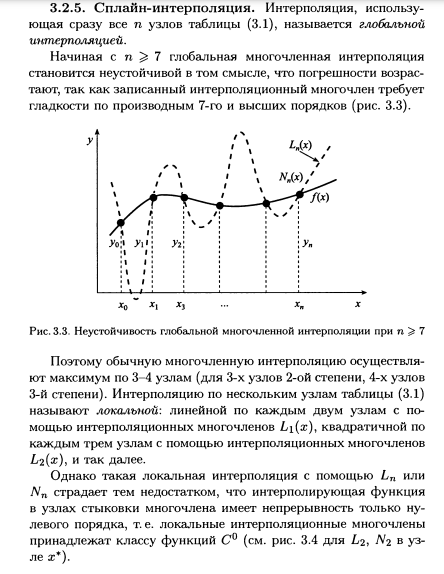
таблица 3.
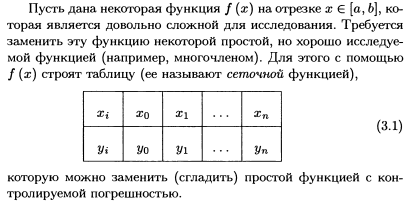
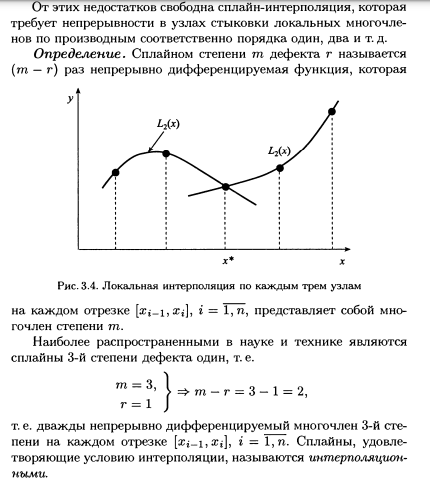
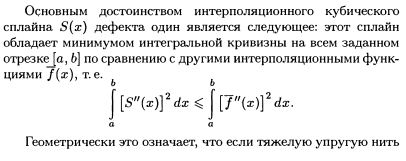
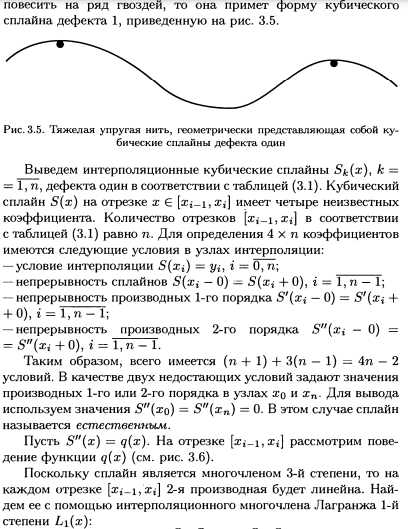
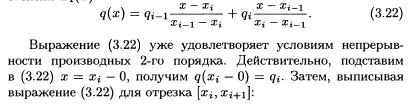
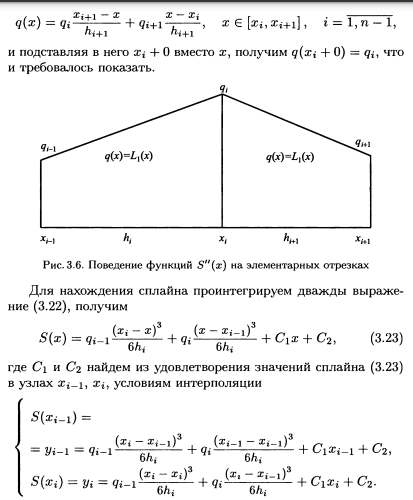
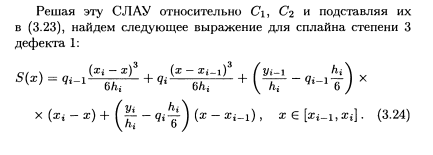
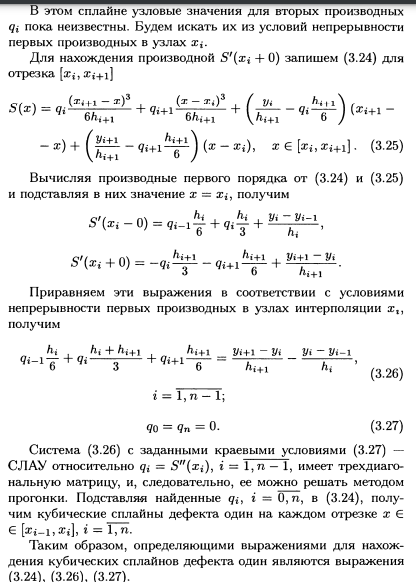
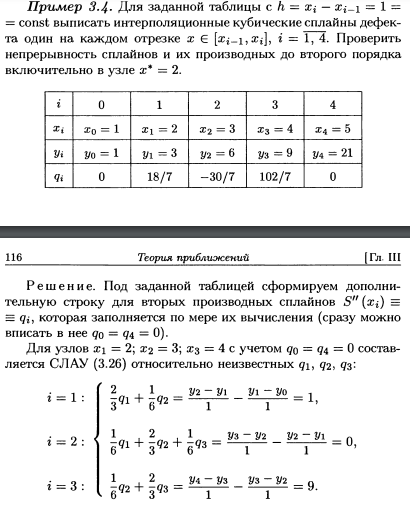
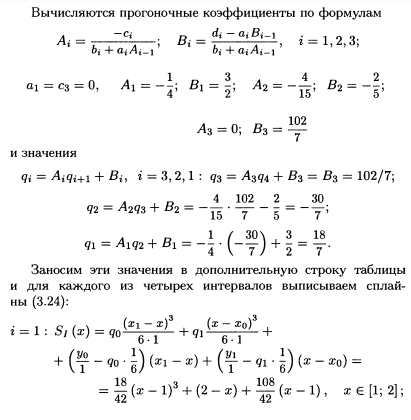
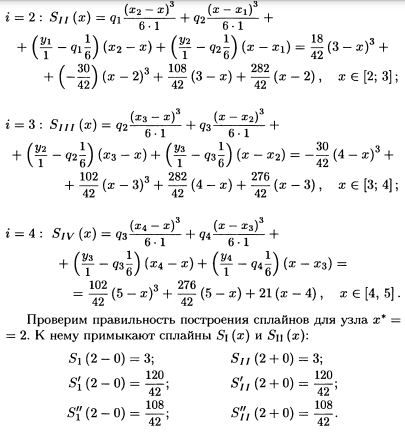

Сплайн интерполяции состоит из нескольких многочленов, и каждый многочлен определяется двумя соседними точками данных, так что любые два смежных многочлена и их производные являются непрерывными в точке соединения.

In [106]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [124]:
# задание параметров
# x = [0., 1.7, 3.4, 5.1, 6.8]
# y = [0., 1.3038, 1.8439, 2.2583, 2.6077]
x = [i for i in range(1, 6)]
y = [1, 3, 6, 9, 21]
h = 1
X_done = 2

In [125]:
x = pd.Series(x)
y = pd.Series(y)
df = pd.concat([x, y], axis = 1)
Q = np.zeros(5)
df['Q'] = Q

In [126]:
# перевод значений вектора значений в тип данных float
def floating(vect):
    b = []
    for i in vect:
        b.append(float(i))
    return np.array(b)
# good working

In [127]:
x, y = floating(x), floating(y)

In [128]:
# составим СЛАУ
def create_slau(h, y):
    matrix = np.array([[0 , (2 * h) / 3, h/6],
             [h / 6, (2 * h) / 3, h/6],
             [h / 6, (2 * h) / 3, 0]])
    b = []
    for i in range(1, 4):
        b.append(((y[i + 1] - y[i]) / h) - ((y[i] - y[i - 1]) / h))
    b = np.array(b)
    return matrix, b

In [129]:
def define_vectors_A_B(matrix, b):
    A = [0]
    B = [0]
    for i in range(3):
        A.append(-matrix[i][2] / (matrix[i][1] + matrix[i][0] * A[-1]))
        B.append((b[i] - matrix[i][0] * B[-1]) / (matrix[i][1] + matrix[i][0] * A[-2]))
    A.pop(0)
    B.pop(0)
    return A, B

In [130]:
def define_qi(Q, A, B):
    for i in range(len(Q) - 2):
        Q[3 - i] = A[2 - i] * Q[3 - i + 1] + B[2 - i]
    
    c = 0
    for i in Q:
        c += 1
        print('q' + str(c), '=', i)
    return Q

In [131]:
def s_in_X(Q, X_done, x, y):
    s = []
    for i in range(1,5):
        a = ((Q[i - 1] * ((x[i] - X_done) ** 3)) / (6 * h)) + \
        ((Q[i] * ((X_done - x[i-1]) ** 3)) / (6 * h))
        b = ((y[i-1]/h) - (Q[i - 1] * (h/6))) * (x[i] - X_done)
        c = ((y[i]/h) - (Q[i] * (h/6))) * (X_done - x[i-1])
        s.append(a + b + c)
    for i in range(len(x)):
        if X_done >= x[i] and X_done <= x[i+1]:
            return s[i]

In [132]:
def graph(x, y):
    # Ввод данных
    x = x
    y = y

    cubic_interpolation_model = interp1d(x, y, kind = "cubic")

    # Рисуем график
    X_=np.linspace(x.min(), x.max(), 500)
    Y_=cubic_interpolation_model(X_)

    plt.plot(X_, Y_)
    plt.title("Кубический сплайн для функции, заданной в узлах интерполяции")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

## Основные используемые формулы в данной задаче. По сути, вся теория
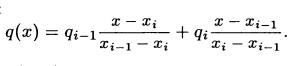
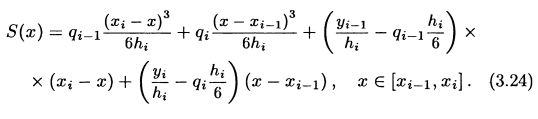
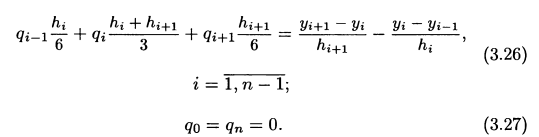

**Задание**
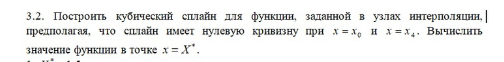
**_Дисклеймер_**

Необходимости читать текст - нет. Ты можешь просто переписать все выводы (значения, таблицы, графики), не вникая в суть или, чтобы самому ориентироваться в написаном, читать по ходу записи. Формулы, которые ниже даются в тексте списать необходимо.

Для начала перепиши задание и свой вариант(указан ниже в виде таблицы, но q1 - q3 оставить пустыми). Столбец "0" - Х, "1" - У

In [133]:
df

,0,1,Q
0,1,1,0.0
1,2,3,0.0
2,3,6,0.0
3,4,9,0.0
4,5,21,0.0


Теперь первым делом необходимо создать СЛАУ для нахождения коэффициентов q. Просто сделаем, что от нас требуется. Составим сразу матричную форму СЛАУ.

In [134]:
create_slau(h, y)

(array([[0.        , 0.66666667, 0.16666667],
        [0.16666667, 0.66666667, 0.16666667],
        [0.16666667, 0.66666667, 0.        ]]),
 array([1., 0., 9.]))

Выше приведены матрица СЛАУ альфа (а) и вектор ответов b. Записать их слева направо: сначала матрицу a, затем вектор b.

далее по формулам 
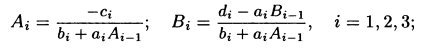
определяются **погоночные коэфы**. Их номера соответствуют номеру в списке ниже. Например, самый первый элемент - это А1, самый последний - B3. В первом (список значений А) и втором (список значений В) списках должно быть указано не более 3х элементов.

In [135]:
print('([A1, A2, A3], [B1, B2, B3])')
define_vectors_A_B(create_slau(1, y)[0], create_slau(1, y)[1])

([A1, A2, A3], [B1, B2, B3])


([-0.25, -0.26666666666666666, -0.0], [1.5, -0.4, 14.571428571428571])

Теперь, наконец, найдем **коэффы q2, q3, q4**. В условии про q1 и q2 сказано, что они заведомо равны 0, это мы уже отметили. 
Остальные ищутся по формуле 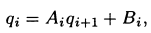 Значения приведены ниже

In [136]:
Q = define_qi(Q,
          define_vectors_A_B(create_slau(1, y)[0], create_slau(1, y)[1])[0],
          define_vectors_A_B(create_slau(1, y)[0], create_slau(1, y)[1])[1])

q1 = 0.0
q2 = 2.571428571428571
q3 = -4.285714285714286
q4 = 14.571428571428571
q5 = 0.0


Так мы теперь заполнили таблицу. Ее мы используем в следуюшем шаге.

In [137]:
df = pd.concat([pd.Series(x), pd.Series(y)], axis = 1)
df['Q'] = Q
df

,0,1,Q
0,1.0,1.0,0.000000
1,2.0,3.0,2.571429
2,3.0,6.0,-4.285714
3,4.0,9.0,14.571429
4,5.0,21.0,0.000000


In [138]:
h

1

####  Воспользуемся основной формулой, которая дает нам возможность сделать сплайн. Здесь мы просто подставляем для каждого i свои параметры x, y, q, h. Причем 
$$ h = Xi - Xi-1$$
xi и xi-1 соответсвующие таблице значения. h - const, дан перед данной ячейкой. Всего необходимо найти
$$S_1, S_2, S_3, S_4$$
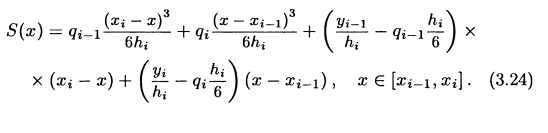
Значения для всех S нужно просто подставить из таблицы, которую мы уже составили (ячейка ниже), не производя арифметические действия.

Наконец сам график, который нам нужно было построить

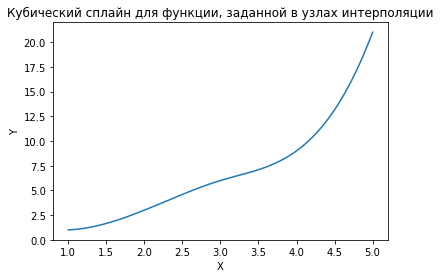

In [139]:
graph(x,y)

Теперь посчитаем значение функции У в заданной условием задачи точке Х*.

In [140]:
print('S(x*) =', s_in_X(Q, X_done, x, y))

S(x*) = 3.0
